# Simple Decision Tree Model

In [4]:
Image(url='https://www.analyticsvidhya.com/wp-content/uploads/2016/04/dt.png')
# Credits Image Analyticsvidhya

## Dataset
This dataset usage for Kaggle InClass Competition Telecom Churn Analytics.

The dataset used of this coding,you can downloading in this link.

https://www.kaggle.com/c/churn-analytics-bda

###### Import Libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import warnings
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation,metrics
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc
from IPython.display import Image
from IPython.core.display import HTML 

warnings.simplefilter("ignore")
%matplotlib inline

In [5]:
train = pd.read_csv('Datasets/churnTrain.csv')
test = pd.read_csv('Datasets/churnTest.csv')

In [6]:
# Adiciona coluna Churn no dataset de teste para poder fazer merge entre os dois.
test['Churn'] = 'TESTE'
dataframes = [train, test]
churnData = pd.concat(dataframes) 

#### Feature Engineering

N/A treatment, applied mean values in N/A columns.

In [7]:
churnData['Voice_Mail_Plan'].fillna(' no',inplace=True)
churnData['International_Plan'].fillna(' no',inplace=True)
churnData['Account_Length'].fillna(churnData['Account_Length'].mean(),inplace=True)
churnData['Total_Night_Minutes'].fillna(churnData['Total_Night_Minutes'].mean(),inplace=True)
churnData['Total_Intl_Calls'].fillna(churnData['Total_Intl_Calls'].mean(),inplace=True)
churnData['Total_Night_Charge'].fillna(churnData['Total_Night_Charge'].mean(),inplace=True)
churnData['Total_Night_Calls'].fillna(churnData['Total_Night_Calls'].mean(),inplace=True)
churnData['Total_Night_Minutes'].fillna(churnData['Total_Night_Minutes'].mean(),inplace=True)
churnData['Total_Eve_Charge'].fillna(churnData['Total_Eve_Charge'].mean(),inplace=True)
churnData['Total_Eve_Calls'].fillna(churnData['Total_Eve_Calls'].mean(),inplace=True)
churnData['Total_Eve_Minutes'].fillna(churnData['Total_Eve_Minutes'].mean(),inplace=True)
churnData['Total_Day_charge'].fillna(churnData['Total_Day_charge'].mean(),inplace=True)
churnData['Total_Day_Calls'].fillna(churnData['Total_Day_Calls'].mean(),inplace=True)
churnData['Total_Day_minutes'].fillna(churnData['Total_Day_minutes'].mean(),inplace=True)

In [8]:
churnData['Churn'] = churnData['Churn'].astype('category')
churnData['State'] = churnData['State'].astype('category')
churnData['Voice_Mail_Plan'] = churnData['Voice_Mail_Plan'].astype('category')
churnData['International_Plan'] = churnData['International_Plan'].astype('category')

churnData['Churn'] = churnData['Churn'].cat.codes
churnData['State_cat'] = churnData['State'].cat.codes

##### One Hot Enconding - OHE

In [9]:
cols_to_transform = ['International_Plan','Voice_Mail_Plan']
churnData = pd.get_dummies(churnData, columns=cols_to_transform)

##### Train and test Split

In [10]:
## Train and test separated again
churnData = churnData[['Account_Length','Area_Code','Phone_No','No_Vmail_Messages','Total_Day_minutes','Total_Day_Calls',
                      'Total_Day_charge','Total_Night_Calls','Total_Night_Charge','Total_Intl_Minutes','Total_Intl_Calls',
                      'Total_Intl_Charge','No_CS_Calls','State_cat','Voice_Mail_Plan_ no','Voice_Mail_Plan_ yes',
                       'International_Plan_ no','International_Plan_ yes','Churn']]


churnTrain = churnData.query('Churn!=2')
churnTest = churnData.query('Churn ==2')
churnTest.drop('Churn', axis=1)



Y = pd.factorize(churnTrain['Churn'].values)[0].reshape(-1,1)
X = churnTrain.drop('Churn',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [11]:
churnData.columns = ['Account_Length','Area_Code','Phone_No','No_Vmail_Messages','Total_Day_minutes','Total_Day_Calls',
                    'Total_Day_charge','Total_Night_Calls','Total_Night_Charge','Total_Intl_Minutes','Total_Intl_Calls',
                    'Total_Intl_Charge','No_CS_Calls','State_cat','Voice_Mail_Plan_no','Voice_Mail_Plan_yes',
                    'International_Plan_no','International_Plan_yes','Churn']

In [29]:
model_tree = tree.DecisionTreeClassifier(criterion='gini'
                                        ,splitter='best'
                                        ,max_depth=10
                                        ,min_samples_split=5
                                        ,min_samples_leaf=5
                                        ,min_weight_fraction_leaf=0.2
                                        ,max_features=5
                                        ,random_state=16
                                        ,max_leaf_nodes=10
                                        ,min_impurity_split=0.5
                                        ,min_impurity_decrease=0
                                        ,class_weight='balanced'
                                        ,presort=True)

In [30]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=10,
            min_impurity_decrease=0, min_impurity_split=0.5,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.2, presort=True, random_state=16,
            splitter='best')

In [31]:
model_tree.score(X_test,y_test)

0.8545454545454545

In [32]:
y_pred = model_tree.predict(X_test)

##### Confusion Matrix 

In [33]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[940   0]
 [160   0]]
             precision    recall  f1-score   support

          0       0.85      1.00      0.92       940
          1       0.00      0.00      0.00       160

avg / total       0.73      0.85      0.79      1100



##### ROC Curve

In [34]:
false_positive_rate, true_positive_rate,thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate,true_positive_rate)

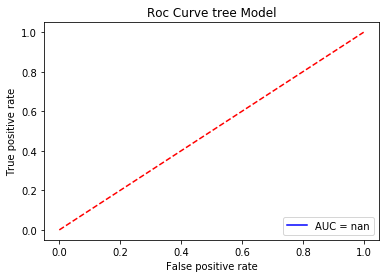

In [35]:
plt.title('Roc Curve tree Model')
plt.plot(false_positive_rate,true_positive_rate,'b', label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()